## Setup

In [1]:
# general setup
%run setup.ipynb
# import popgen
# development setup
%reload_ext autoreload
%autoreload 1
%aimport popgen
%aimport popgen.config
%aimport popgen.analysis
%aimport popgen.util
%aimport popgen.caching

In [2]:
# setup analysis (see analysis_config.ipynb for configuration)
analysis = popgen.analysis.PopulationAnalysis('../data/analysis')
analysis

<PopulationAnalysis at '../data/analysis'>

In [3]:
# plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')
plt.rcParams['figure.dpi'] = 120
%config InlineBackend.figure_formats = {'retina', 'png'}

## Nucleotide diversity

In [4]:
chromosomes = ('2R', '2L', '3R', '3L', 'X')
autosomes = chromosomes[:4]

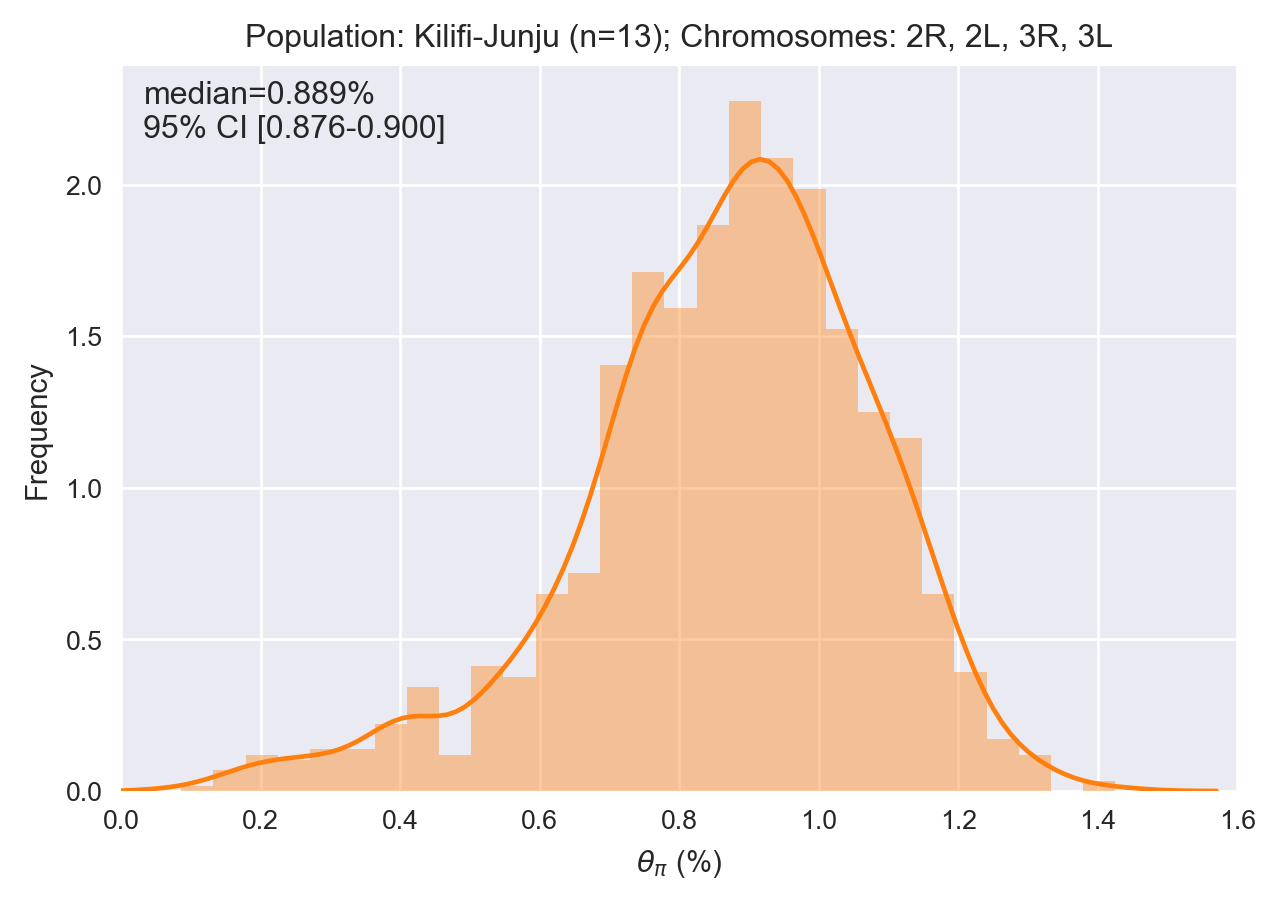

In [5]:
analysis.windowed_statistic_distplot('diversity', chrom=autosomes, window_size=100000, pop='junju', xlim=(0, 1.6))

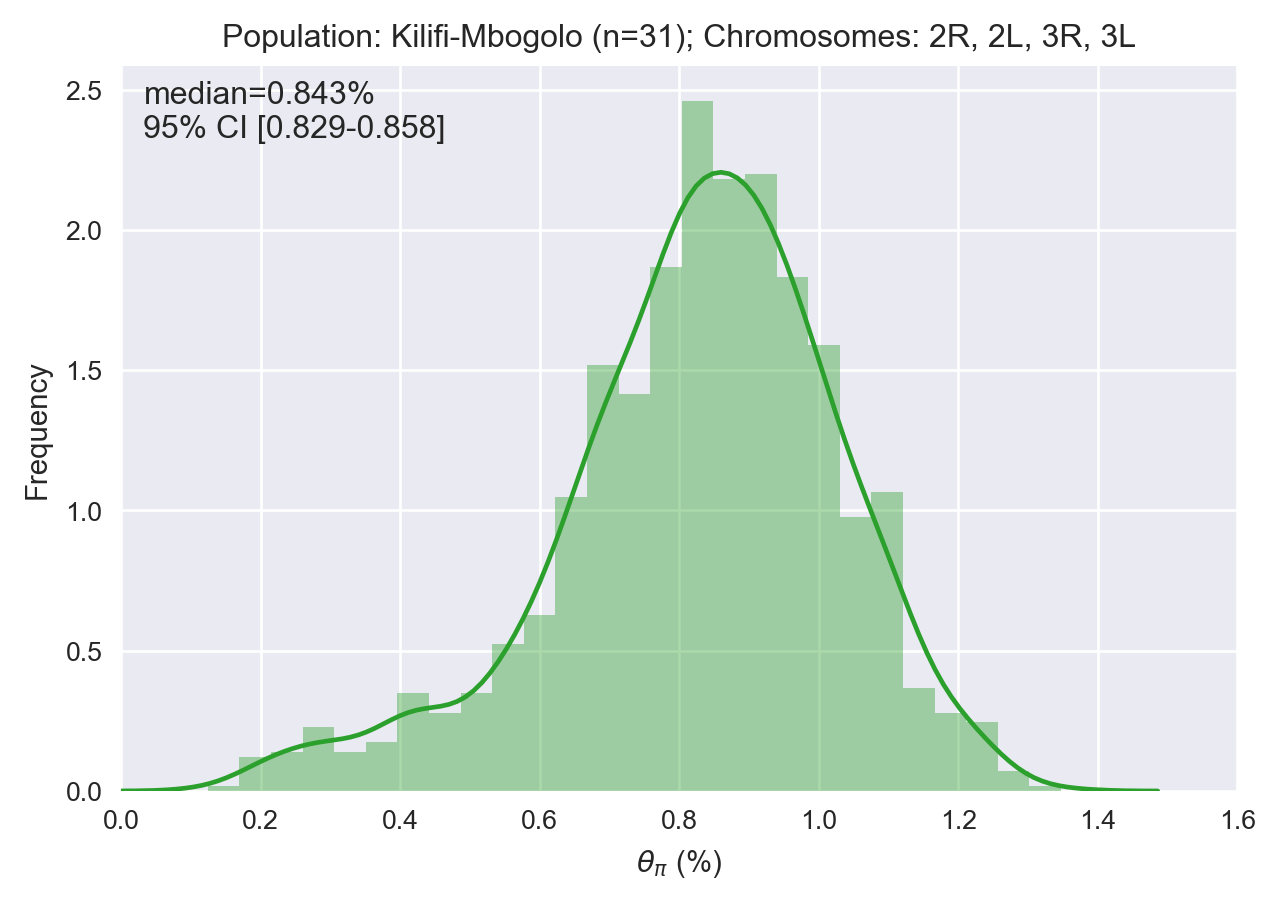

In [6]:
analysis.windowed_statistic_distplot('diversity', chrom=autosomes, window_size=100000, pop='mbogolo', xlim=(0, 1.6))

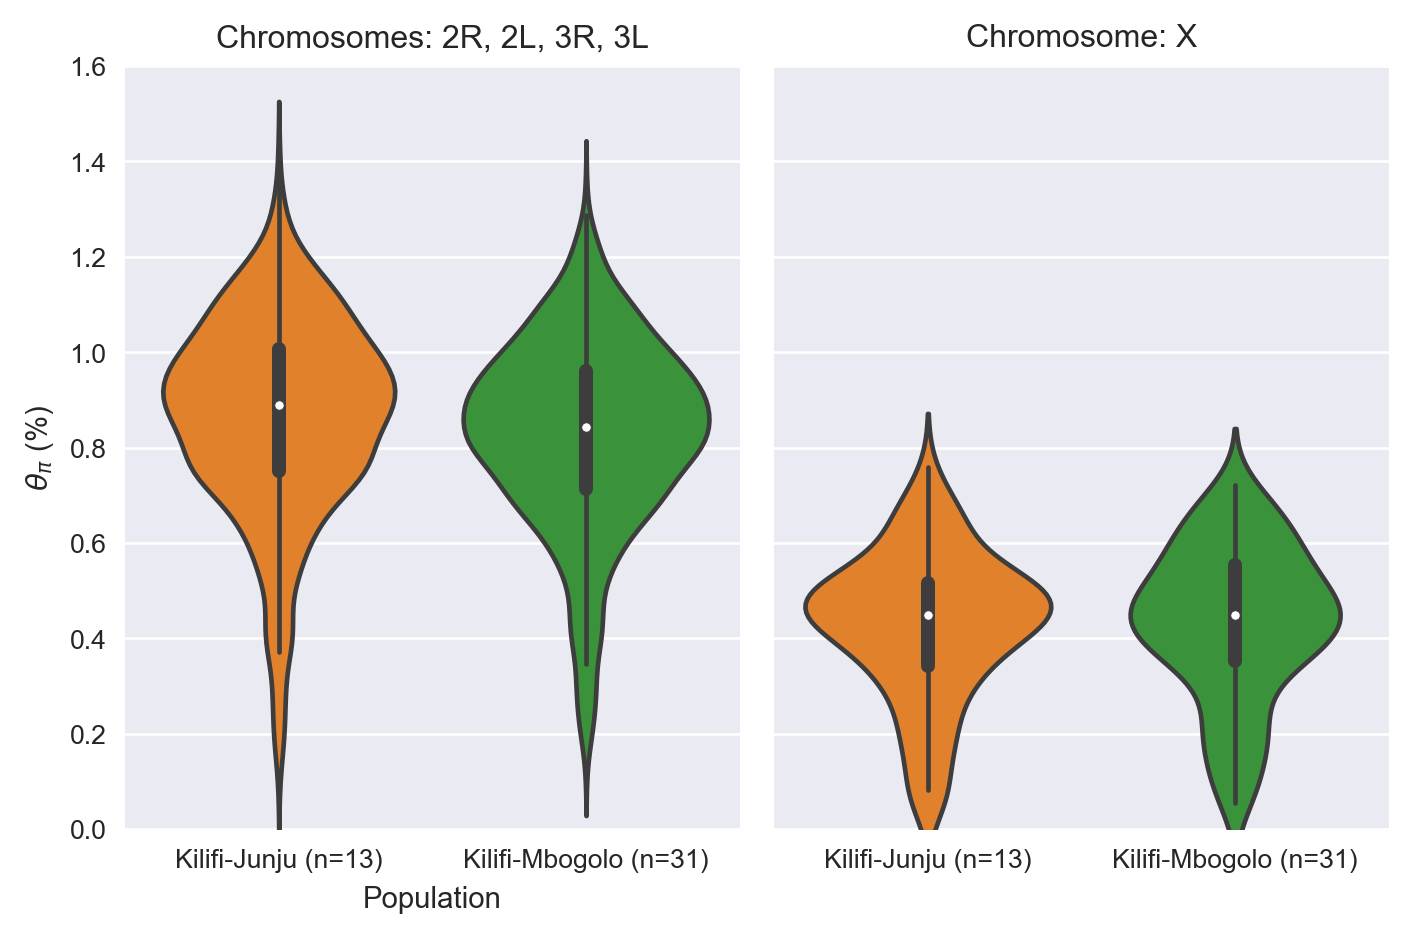

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True)
analysis.windowed_statistic_violinplot('diversity', chrom=autosomes, window_size=100000, pops=['junju', 'mbogolo'], ax=axs[0], ylim=(0, 1.6))
analysis.windowed_statistic_violinplot('diversity', chrom='X', window_size=100000, pops=['junju', 'mbogolo'], ax=axs[1], ylim=(0, 1.6))
axs[1].set_xlabel('')
axs[1].set_ylabel('')
fig.tight_layout()
fig.savefig('../artwork/pi_comparisons.png', bbox_inches='tight')

In [8]:
analysis.windowed_statistic_compare('diversity', chrom=autosomes, pops=['junju', 'mbogolo'], window_size=100000)

Kilifi-Junju (n=13)   : median=0.889%; 95% CI [0.876-0.900]
Kilifi-Mbogolo (n=31) : median=0.843%; 95% CI [0.829-0.858]
Kilifi-Junju (n=13) versus Kilifi-Mbogolo (n=31) : Wilcoxon signed rank test P=1.32e-35; statistic=238514.0


In [9]:
analysis.windowed_statistic_compare('diversity', chrom='X', pops=['junju', 'mbogolo'], window_size=100000)

Kilifi-Junju (n=13)   : median=0.448%; 95% CI [0.429-0.476]
Kilifi-Mbogolo (n=31) : median=0.449%; 95% CI [0.420-0.468]
Kilifi-Junju (n=13) versus Kilifi-Mbogolo (n=31) : Wilcoxon signed rank test P=0.260; statistic=4924.0


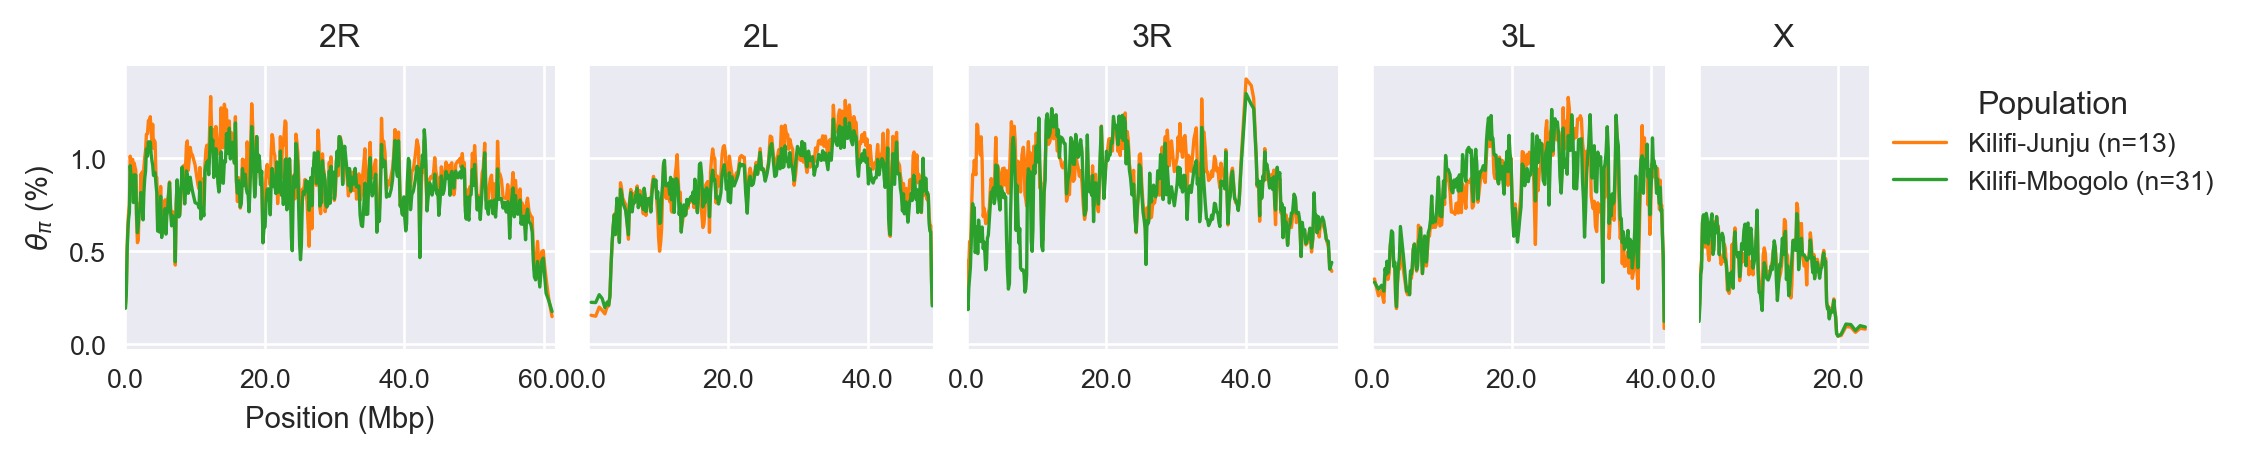

In [10]:
fig = plt.figure(figsize=(8, 2))
analysis.windowed_statistic_genomeplot('diversity', chroms=chromosomes, pop='junju', window_size=100000, fig=fig)
analysis.windowed_statistic_genomeplot('diversity', chroms=chromosomes, pop='mbogolo', window_size=100000, fig=fig)
fig.savefig('../artwork/pi_genome.png', bbox_inches='tight')

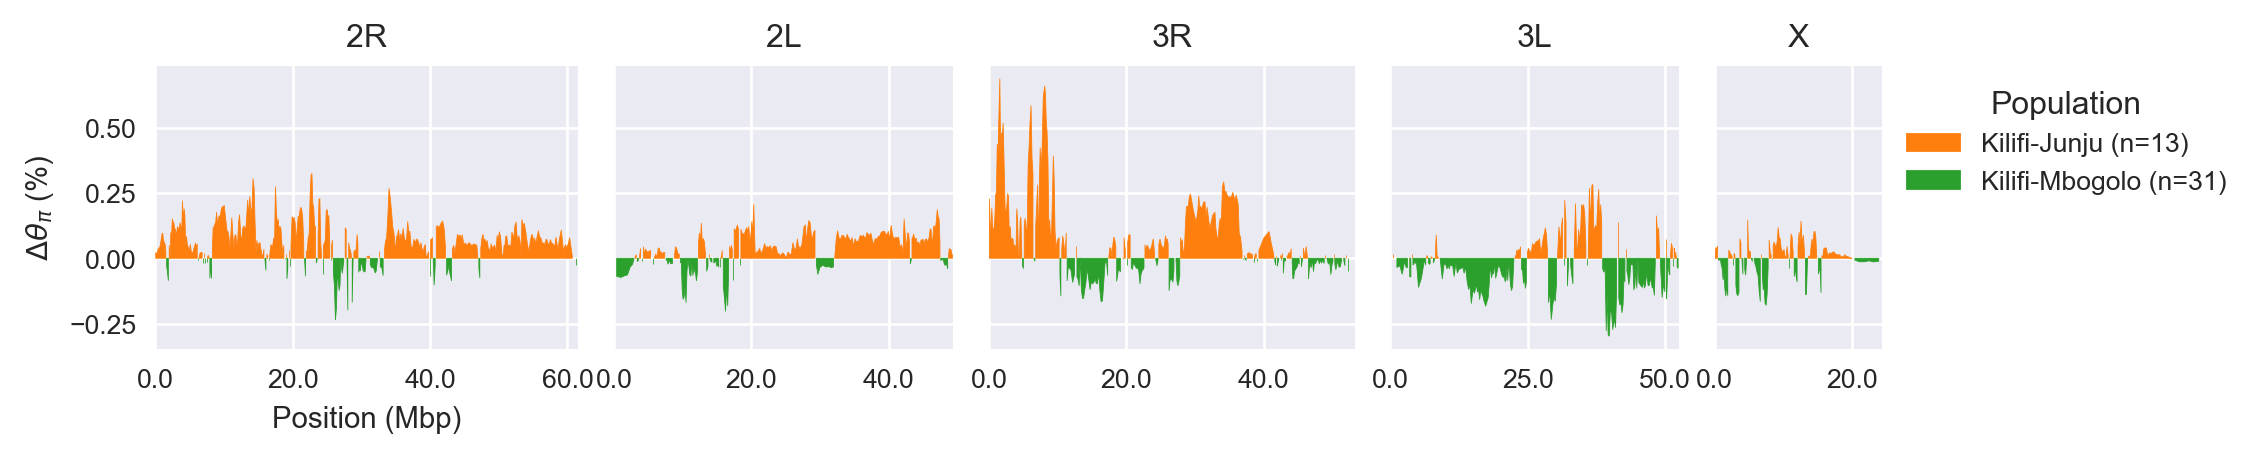

In [11]:
fig = plt.figure(figsize=(8, 2))
analysis.windowed_diversity_delta_genomeplot(chroms=chromosomes, pop1='junju', pop2='mbogolo', window_size=100000, fig=fig)
fig.savefig('../artwork/pi_delta_genome.png', bbox_inches='tight')

## Watterson's theta

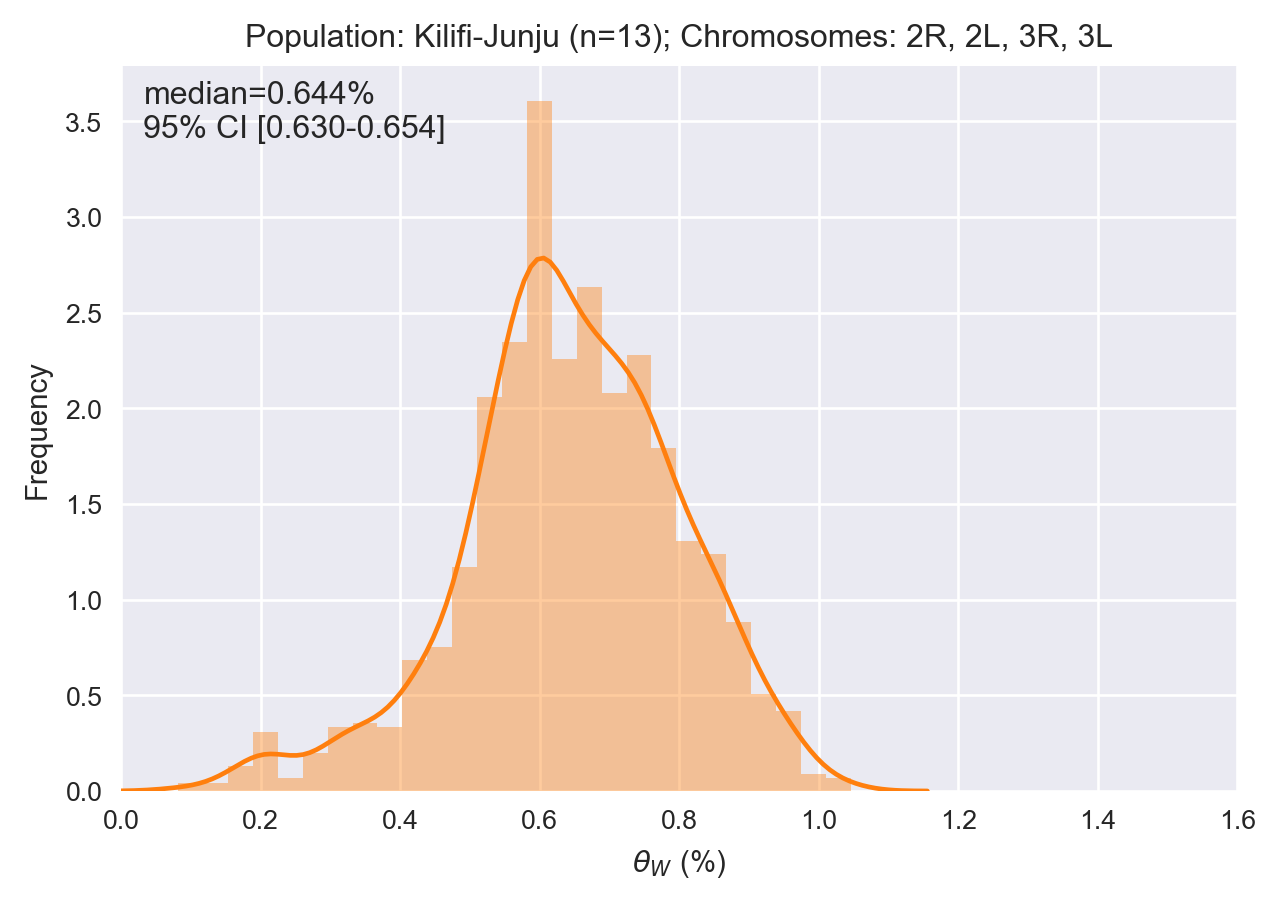

In [12]:
analysis.windowed_statistic_distplot('watterson_theta', chrom=autosomes, window_size=100000, pop='junju', xlim=(0, 1.6))

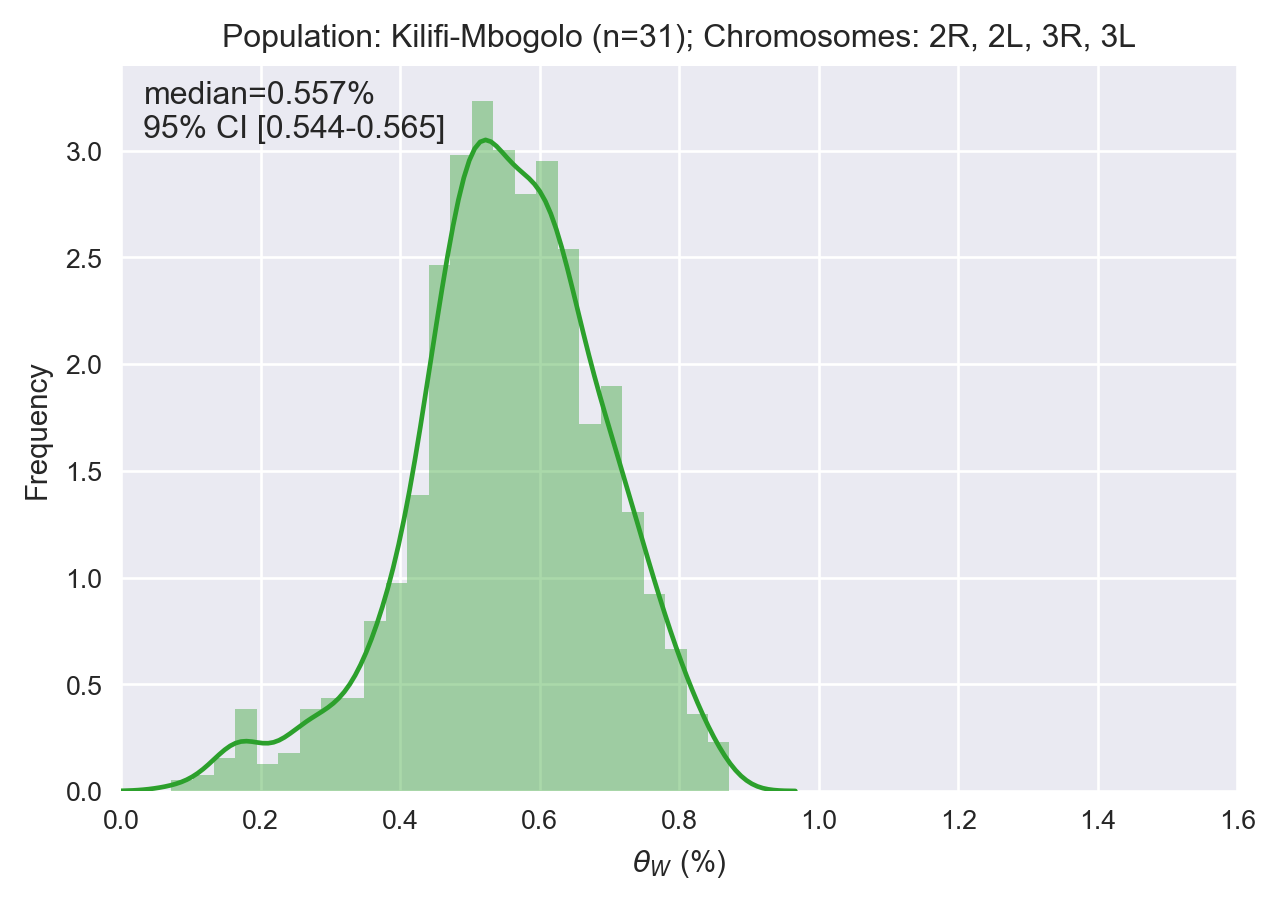

In [13]:
analysis.windowed_statistic_distplot('watterson_theta', chrom=autosomes, window_size=100000, pop='mbogolo', xlim=(0, 1.6))

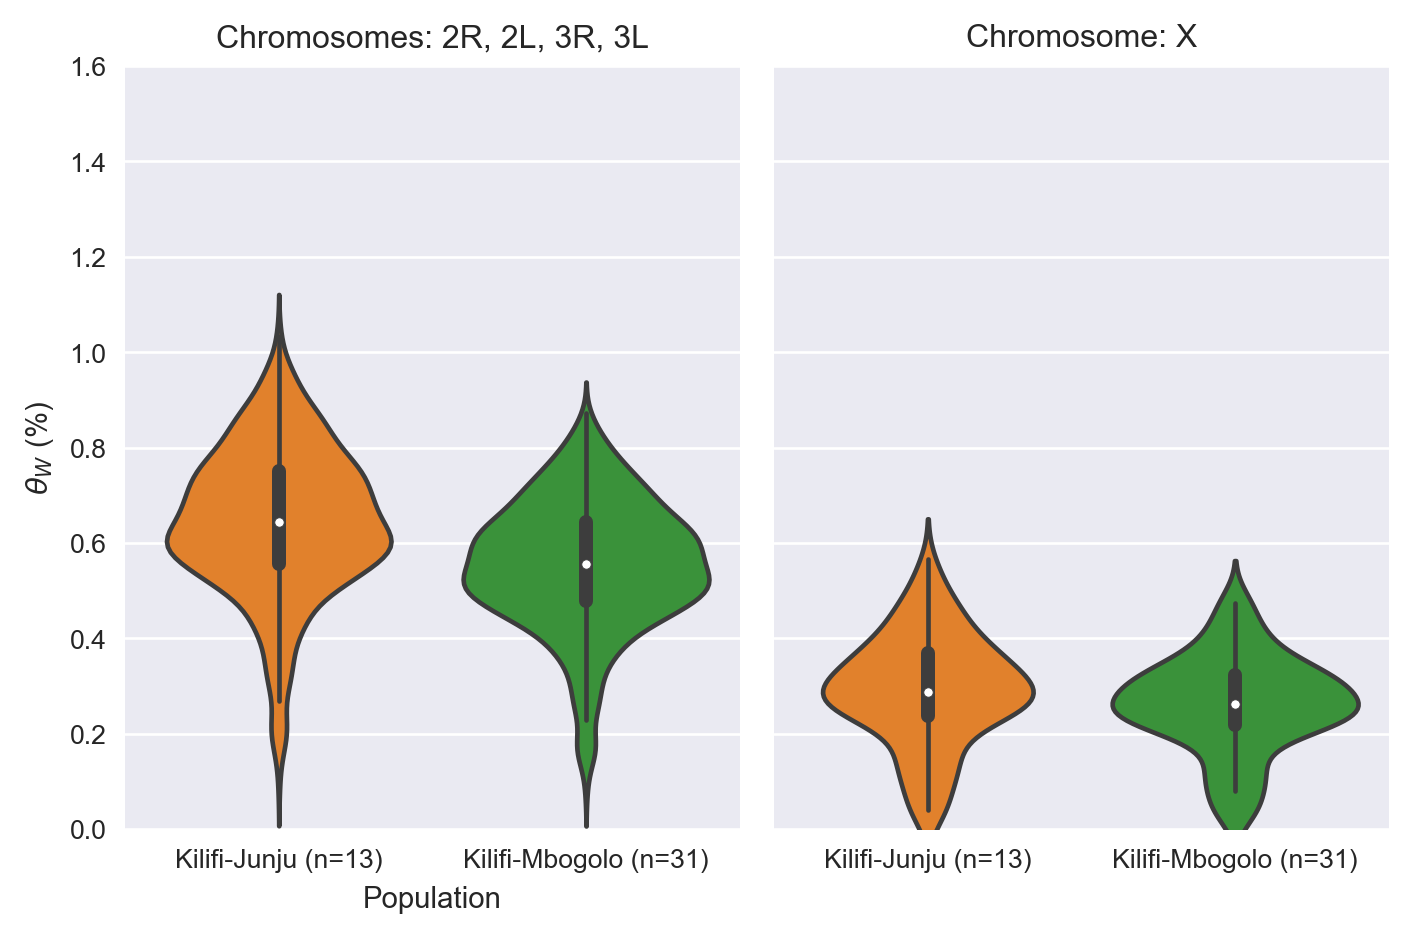

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True)
analysis.windowed_statistic_violinplot('watterson_theta', chrom=autosomes, window_size=100000, pops=['junju', 'mbogolo'], ax=axs[0], ylim=(0, 1.6))
analysis.windowed_statistic_violinplot('watterson_theta', chrom='X', window_size=100000, pops=['junju', 'mbogolo'], ax=axs[1], ylim=(0, 1.6))
axs[1].set_xlabel('')
axs[1].set_ylabel('')
fig.tight_layout()
fig.savefig('../artwork/theta_w_comparisons.png', bbox_inches='tight')

In [15]:
analysis.windowed_statistic_compare('watterson_theta', chrom=autosomes, pops=['junju', 'mbogolo'], window_size=100000)

Kilifi-Junju (n=13)   : median=0.644%; 95% CI [0.630-0.654]
Kilifi-Mbogolo (n=31) : median=0.557%; 95% CI [0.544-0.565]
Kilifi-Junju (n=13) versus Kilifi-Mbogolo (n=31) : Wilcoxon signed rank test P=1.92e-181; statistic=27082.0


In [16]:
analysis.windowed_statistic_compare('watterson_theta', chrom='X', pops=['junju', 'mbogolo'], window_size=100000)

Kilifi-Junju (n=13)   : median=0.287%; 95% CI [0.274-0.315]
Kilifi-Mbogolo (n=31) : median=0.261%; 95% CI [0.246-0.286]
Kilifi-Junju (n=13) versus Kilifi-Mbogolo (n=31) : Wilcoxon signed rank test P=6.63e-22; statistic=488.0


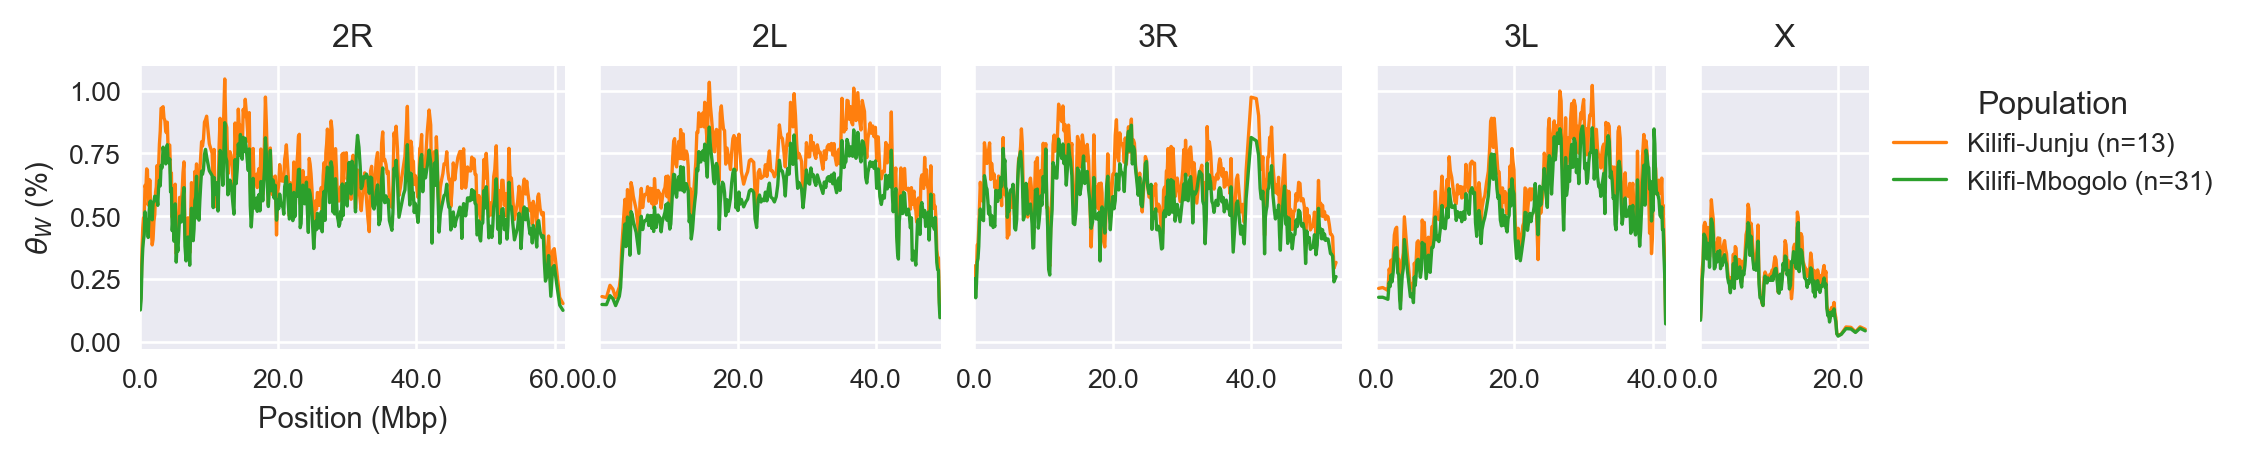

In [17]:
fig = plt.figure(figsize=(8, 2))
analysis.windowed_statistic_genomeplot('watterson_theta', chroms=chromosomes, pop='junju', window_size=100000, fig=fig)
analysis.windowed_statistic_genomeplot('watterson_theta', chroms=chromosomes, pop='mbogolo', window_size=100000, fig=fig)
fig.savefig('../artwork/theta_w_genome.png', bbox_inches='tight')

## Tajima's D

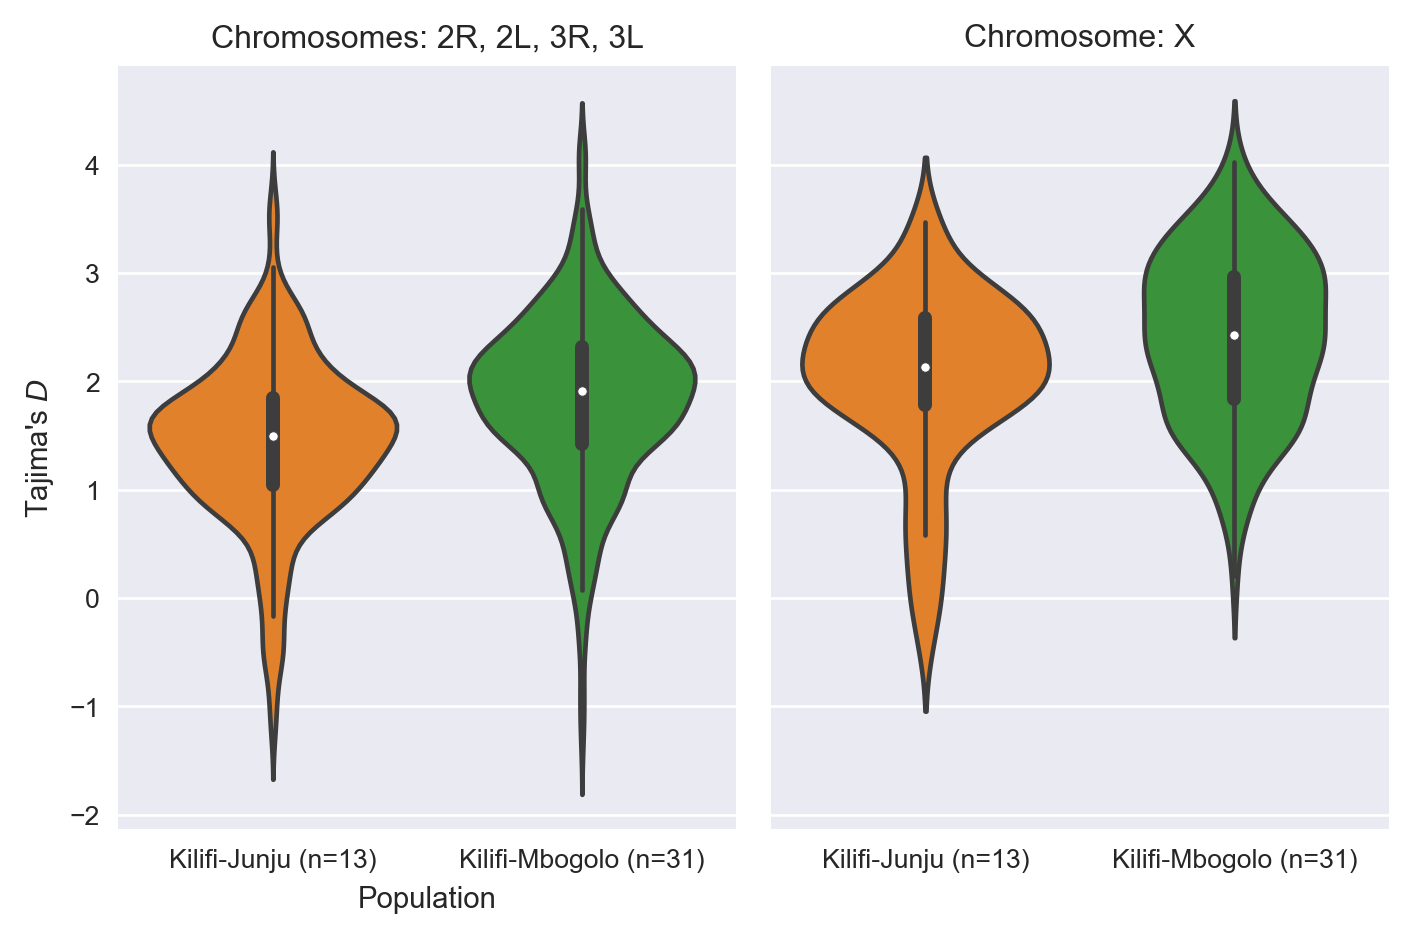

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True)
analysis.windowed_statistic_violinplot('tajima_d', chrom=autosomes, window_size=100000, pops=['junju', 'mbogolo'], ax=axs[0])
analysis.windowed_statistic_violinplot('tajima_d', chrom='X', window_size=100000, pops=['junju', 'mbogolo'], ax=axs[1])
axs[1].set_xlabel('')
axs[1].set_ylabel('')
fig.tight_layout()
fig.savefig('../artwork/tajima_d_comparisons.png', bbox_inches='tight')

In [19]:
analysis.windowed_statistic_compare('tajima_d', chrom=autosomes, pops=['junju', 'mbogolo'], window_size=100000)

Kilifi-Junju (n=13)   : median=1.491; 95% CI [1.437-1.528]
Kilifi-Mbogolo (n=31) : median=1.905; 95% CI [1.856-1.951]
Kilifi-Junju (n=13) versus Kilifi-Mbogolo (n=31) : Wilcoxon signed rank test P=2.35e-75; statistic=161660.0


In [20]:
analysis.windowed_statistic_compare('tajima_d', chrom='X', pops=['junju', 'mbogolo'], window_size=100000)

Kilifi-Junju (n=13)   : median=2.128; 95% CI [2.011-2.211]
Kilifi-Mbogolo (n=31) : median=2.425; 95% CI [2.313-2.595]
Kilifi-Junju (n=13) versus Kilifi-Mbogolo (n=31) : Wilcoxon signed rank test P=3.80e-08; statistic=2640.0


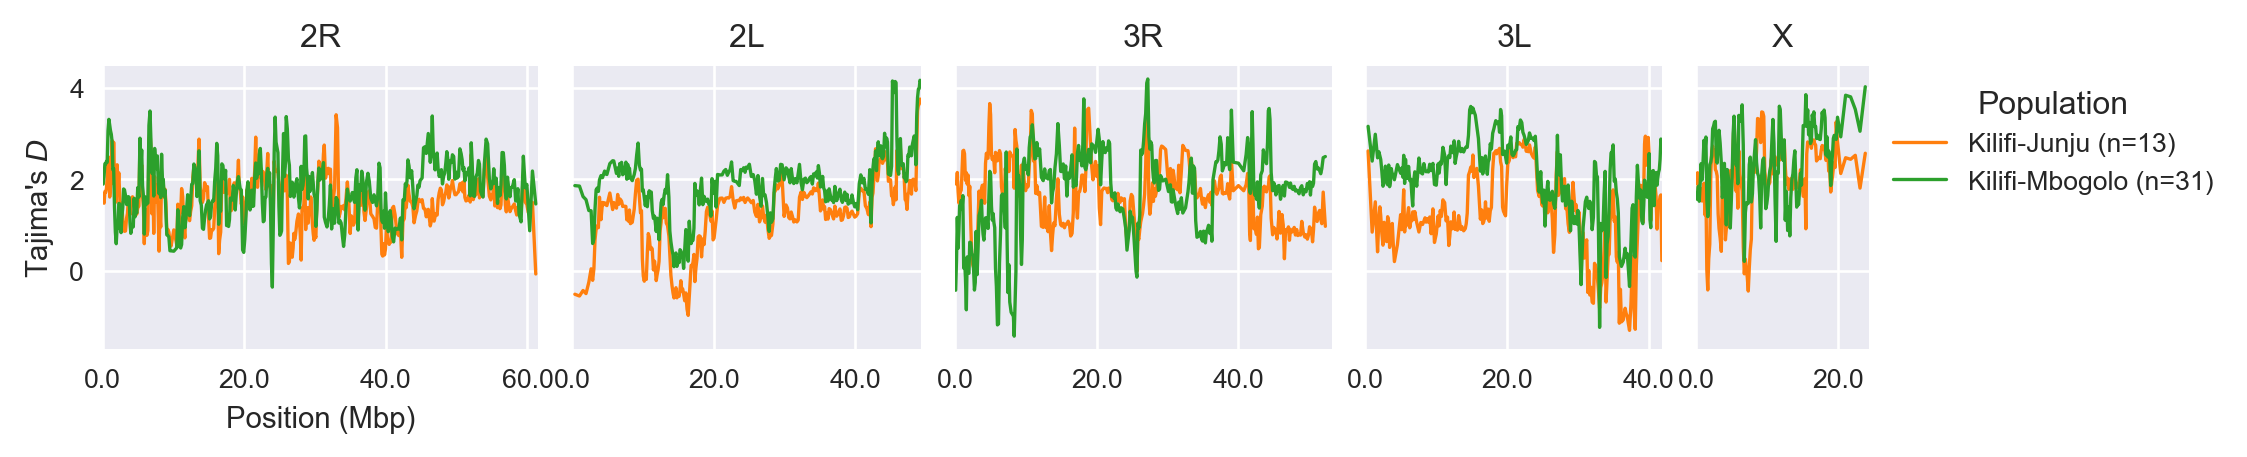

In [21]:
fig = plt.figure(figsize=(8, 2))
analysis.windowed_statistic_genomeplot('tajima_d', chroms=chromosomes, pop='junju', window_size=100000, fig=fig)
analysis.windowed_statistic_genomeplot('tajima_d', chroms=chromosomes, pop='mbogolo', window_size=100000, fig=fig)
fig.savefig('../artwork/tajima_d_genome.png', bbox_inches='tight')